## Approximating Solutions to First-Order Differential Equations
*Anders Poirel*
*18-02-2018*

We implement a simple 4th-order Runge Kotta Methods for approximating solutions to first-order differential equations.

In [4]:
from matplotlib import pyplot

def solve_runge_kotta(f, a, b, c, n):
    """  returns a list where the first item the t-values and as second item 
    the approximated y-values. Plots the approximation over the given interval and
    prints table of approximations up to 3 decimal places\n
    Parameters: f: numeric-valued function taking 2 parameters, a: , b: endpoint of interval, c: initial value, n: number of points to approximate
    """
    h = (a + b) / n
    t = [a]
    y = [c]

    for i in range(0, n):
        t.append(t[i] + h)

        # intermediary calculations
        u1 = y[i]
        u2 = y[i] + 0.5 * h * f(t[i], y[i])
        u3 = y[i] + 0.5 * h * f(t[i] + 0.5 * h, u2)
        u4 = y[i] + h * f(t[i] + 0.5 * h, u3)

        y.append(y[i] + (1/6) * h * (f(t[i], u1) + 2 * f(t[i] + 0.5 * h,  u2) \
            + 2 * f(t[i] + 0.5 * h, u3) + f(t[i] + h,  u4)) )

    pyplot.scatter(t, y)

    print("t-values    y-values")
    for i in range(0, len(t)):
        print("%10.3f    %10.3f" % (t[i], y[i]))

    return [t, y]

To verify that out implementation works correctly, we approximate solutions to the initial value problem which defines the exponential function:
$$\frac{dy}{dt} = y, y(0) = 1$$

t-values    y-values
     0.000         1.000
     0.500         1.648
     1.000         2.717
     1.500         4.479
     2.000         7.384
     2.500        12.172
     3.000        20.065
     3.500        33.076
     4.000        54.523
     4.500        89.878
     5.000       148.158
     5.500       244.229
     6.000       402.596
     6.500       663.655
     7.000      1093.994
     7.500      1803.380
     8.000      2972.759
     8.500      4900.408
     9.000      8078.017
     9.500     13316.106
    10.000     21950.768


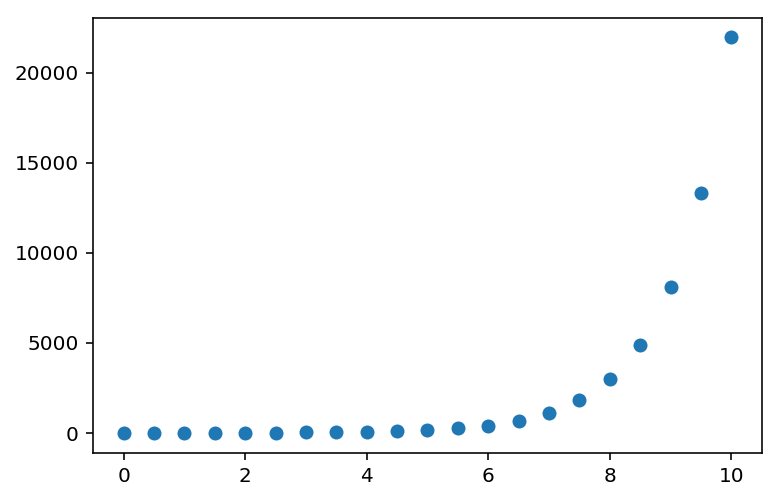

In [5]:
def f(x,y): return y
results = solve_runge_kotta(f, 0, 10, 1, 20)

We now test out code on a more complicated first-order differential equation:
$$ \frac{dy}{dt} = 4\cos(x)y + x^2, y(0) = 1$$

t-values    y-values
     0.000         1.000
     0.200         2.214
     0.400         4.768
     0.600         9.672
     0.800        17.939
     1.000        29.670
     1.200        42.907
     1.400        53.496
     1.600        57.062
     1.800        52.026
     2.000        40.818
     2.200        27.998
     2.400        17.271
     2.600        10.044
     2.800         5.933
     3.000         3.918
     3.200         3.104
     3.400         2.935
     3.600         3.136
     3.800         3.609
     4.000         4.363
     4.200         5.493
     4.400         7.200
     4.600         9.866
     4.800        14.225
     5.000        21.751
     5.200        35.551
     5.400        62.471
     5.600       118.168
     5.800       239.264
     6.000       511.640
     6.200      1131.833
     6.400      2523.781
     6.600      5510.958
     6.800     11440.874
     7.000     21948.214
     7.200     37919.648
     7.400     57728.702
     7.600     76152.940
    

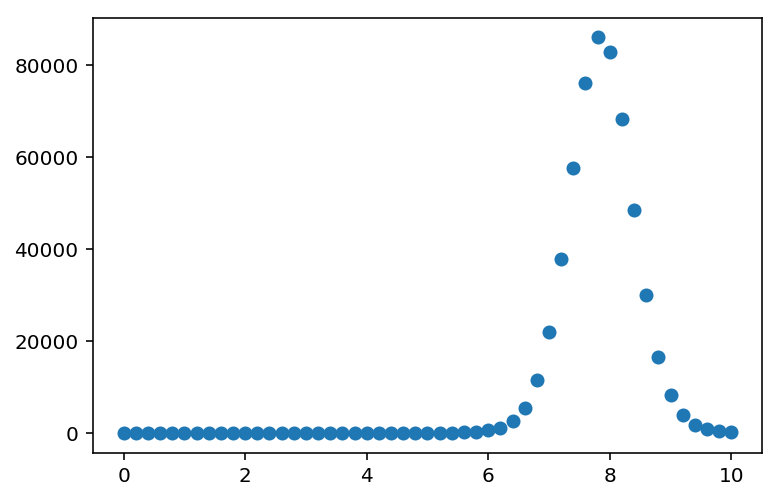

In [4]:
def g(x,y): return 4*math.cos(x)*y + x**2
results = solve_runge_kotta(g, 0, 10, 1, 50)

[Link](https://cocalc.com/projects/33c459eb-4a01-4525-937f-2a4a6899d754/files/Euler.ipynb?session=default) to implementation of Euler's algorithm